In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
GND13Bid = candels[-1]

nearby = GND13Bid[1][1]
host = GND13Bid[1][2]

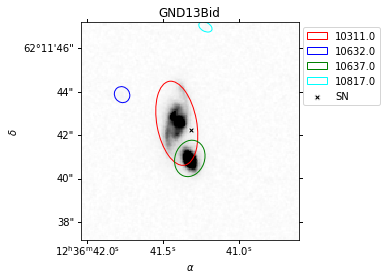

In [14]:
nick = GND13Bid[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Bid[1][0]['RA'],GND13Bid[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.0046,val_max = .175 )

In [35]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot]])

id,z,z_spec,z_peak
str8,str8,str12,str12
10311,1.5300,1.5253,1.5551
10632,0.9400,-1.0000,0.9414
10637,0.5900,0.5850,0.5280
10817,1.5600,-1.0000,1.5635


## GND13Bid published as CC at spec-z~0.585 

The spec-z comes from the host. The postage stamp image seems to show spiral galaxy (id14530) as likely host w/ the SN being just slightly off from the galaxy center. The spiral 14530 has photo-z 0.554, spec-z 0.585. 

The SN has good lc fit for model Ic(CSP-2004fe) at Z~0.585. 

(There is another alt-host id 14561 with phot-z 1.43,spec-z 0.548)

My image doesn't resolve nearly as well (expected since I'm just using cutouts of the full field mosaics while I guess the postage stamp is from a follow-up/detection exposure).

My initial interpretation based on the two images is: 10311 ~ spiral 14530; 10637 ~ alt 14561
Playing with stretch that is the correct interpretation.

Slightly confused/worried that ids aren't the same.  

Even moreso since if 10311 is in fact the spiral that seems to be the host based on better postage stamp, it has a zphot&zpec~1.53; would change the published redshift significantly

My other object 10637 has photz ~ 0.53, specz ~ 0.585. These are in line with the published redshift of the SN, however it seems to me from the postage stamp/my image that this object is very likely not the host based on its seperation.

The image seems like it may show the spiral as two merging galaxies, note the two distinct 'cores' or possibly even just two galaxies that are at very different redshifts happen to look like a single object. 

My catalog regards it as a single object. I'm unclear/need to know for sure but I'm pretty certain the evernote is also regarding it as one single object and as the host.

There is something strange then happening since the one that object which doesn't look like the host in my catalog has the matching redshift of the published host. The redshift of the one that does look like the host in my catalog 

tldr: Since the ids don't lineup, and the redshifts are varying slightly(evernote may have a more updated value);I need way to identify objects in postage stamp so I can compare to my objects. This way all thats left to do is determine which of us has the 'correct' redshift of the object... maybe can check the SN templates against these.

## Try and add dra, ddec functionality to my objects see if that is enough to match ids. Once got that need to know for sure if the evernote considers the host the spiral object. If so why is my host object redshift much different? Also if so (the spiral object is the host) use my redshift for it and see what the lc fits look like for different templates. 